In [63]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE  import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [65]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Hermite/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/QuadSinHFHighNoise/


In [66]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "Diff100_MSEs" in f:
        print(f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Hermite_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_MSEs.parquet


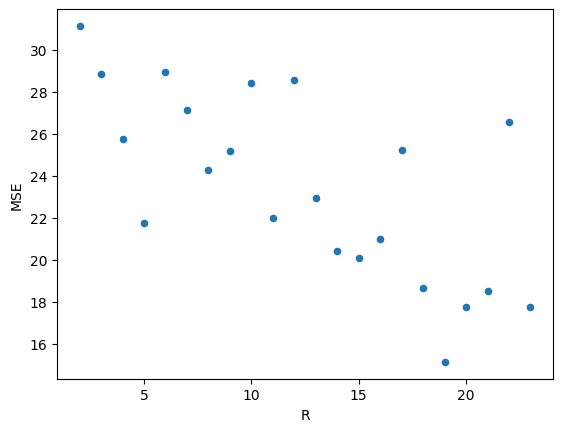

In [67]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [68]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

               0
index           
2      31.134628
3      28.848788
4      25.735170
5      21.764935
6      28.953430
7      27.138325
8      24.274718
9      25.162135
10     28.436812
11     22.021351
12     28.563362
13     22.970845
14     20.448353
15     20.083875
16     21.000836
17     25.217021
18     18.666617
19     15.151572
20     17.741574
21     18.518046
22     26.572757
23     17.767667
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
32           NaN
33           NaN
34           NaN
35           NaN
36           NaN
37           NaN
38           NaN
39           NaN
40           NaN


0    15.151572
Name: 19, dtype: float64


In [69]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Hermite_f{diradd.replace('HighNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

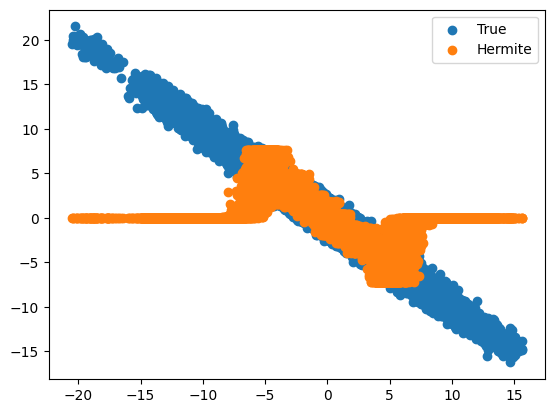

In [70]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Hermite")
plt.legend()
plt.show()